In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

import torch
import torch.nn.functional as F

In [3]:
def one_hot(x, class_count):
    return torch.eye(class_count)[x,:]

In [14]:
def cross_entropy(output, y_target):
    return - torch.sum(torch.log(output) * (y_target), dim=1)

In [15]:
def cost(output, y_target):
    return torch.mean(cross_entropy(output, y_target))

In [16]:
def net_input(X, W, b):
    return (X.mm(W) + b)

In [4]:
y = torch.tensor([0, 1, 2, 2]) 
y_enc = one_hot(y, 3)

X = torch.tensor([[0.1, 0.5],
              [1.1, 2.3],
              [-1.1, -2.3],
              [-1.5, -2.5]])

W = torch.tensor([[0.1, 0.2, 0.3],
              [0.1, 0.2, 0.3]])

bias = torch.tensor([0.01, 0.1, 0.1])

print(y_enc)
print(X)
print(W)
print(bias)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])
tensor([[ 0.1000,  0.5000],
        [ 1.1000,  2.3000],
        [-1.1000, -2.3000],
        [-1.5000, -2.5000]])
tensor([[0.1000, 0.2000, 0.3000],
        [0.1000, 0.2000, 0.3000]])
tensor([0.0100, 0.1000, 0.1000])


In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

class SoftmaxRegression:
    def __init__(self, num_features, num_classes):
        self.num_features = num_features
        self.num_classes = num_classes
        self.weights = torch.zeros(num_features, num_classes, dtype=torch.float32)
        self.bias = torch.zeros(num_classes, dtype=torch.float32)
        
    
    def forward(self, x):
        z = torch.mm(x, self.weights) + self.bias
        a = F.softmax(z)
        return a
    
    def one_hot(self, x, class_count):
        return torch.eye(class_count)[x,:]
    
    def cross_entropy(self, output, y_target):
        return - torch.sum(torch.log(output) * (y_target), dim=1)
    
    def cost_function(self, output, y_target):
        return torch.mean(self.cross_entropy(output, y_target))
    
    def forward(self, x):
        z = torch.mm(x, self.weights) + self.bias
        a = F.softmax(z)
        return a
    
    def train(self, x, y, num_epochs, learning_rate=0.01):
        costs = []
        
        y_enc = self.one_hot(y, self.num_classes)
        
        for e in range(num_epochs):
            
            a = self.forward(x)
            
            dz = a - y_enc
            dw = torch.mm(x.transpose(0, 1), dz)
            db = torch.sum(dz, dim=0)
            
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
            
            cost = self.cost_function(self.forward(x), y_enc)
            costs.append(cost)
        
        costs = np.squeeze(costs)
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()


In [21]:
model = SoftmaxRegression(num_features=2, num_classes=3)

C:\Users\hp\Miniconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


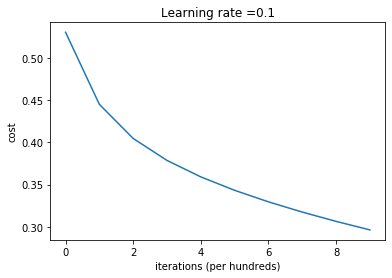

In [22]:
model.train(X, y, num_epochs=10, learning_rate=0.1)